Dataset shape: (10533, 24)

Data types:
 Depth                                       int64
5-day Biochemical Oxygen Demand (mg/L)     object
Ammonia Nitrogen (mg/L)                   float64
Chlorophyll-a (μg/L)                      float64
Dissolved Oxygen (%saturation)            float64
E. coli (cfu/100mL)                       float64
Faecal Coliforms (cfu/100mL)               object
Nitrite Nitrogen (mg/L)                   float64
Nitrate Nitrogen (mg/L)                   float64
Orthophosphate Phosphorus (mg/L)          float64
Phaeo-pigments (μg/L)                     float64
Salinity (psu)                            float64
Silica (mg/L)                             float64
Secchi Disc Depth (M)                     float64
Suspended Solids (mg/L)                   float64
Temperature (°C)                          float64
Total Inorganic Nitrogen (mg/L)           float64
Total Kjeldahl Nitrogen (mg/L)            float64
Total Nitrogen (mg/L)                     float64
Total Pho

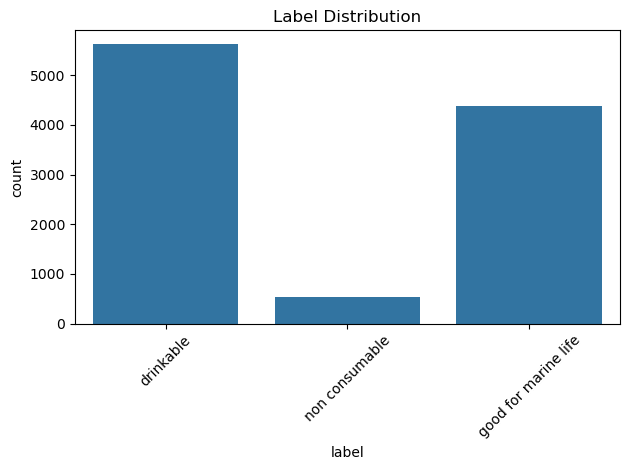

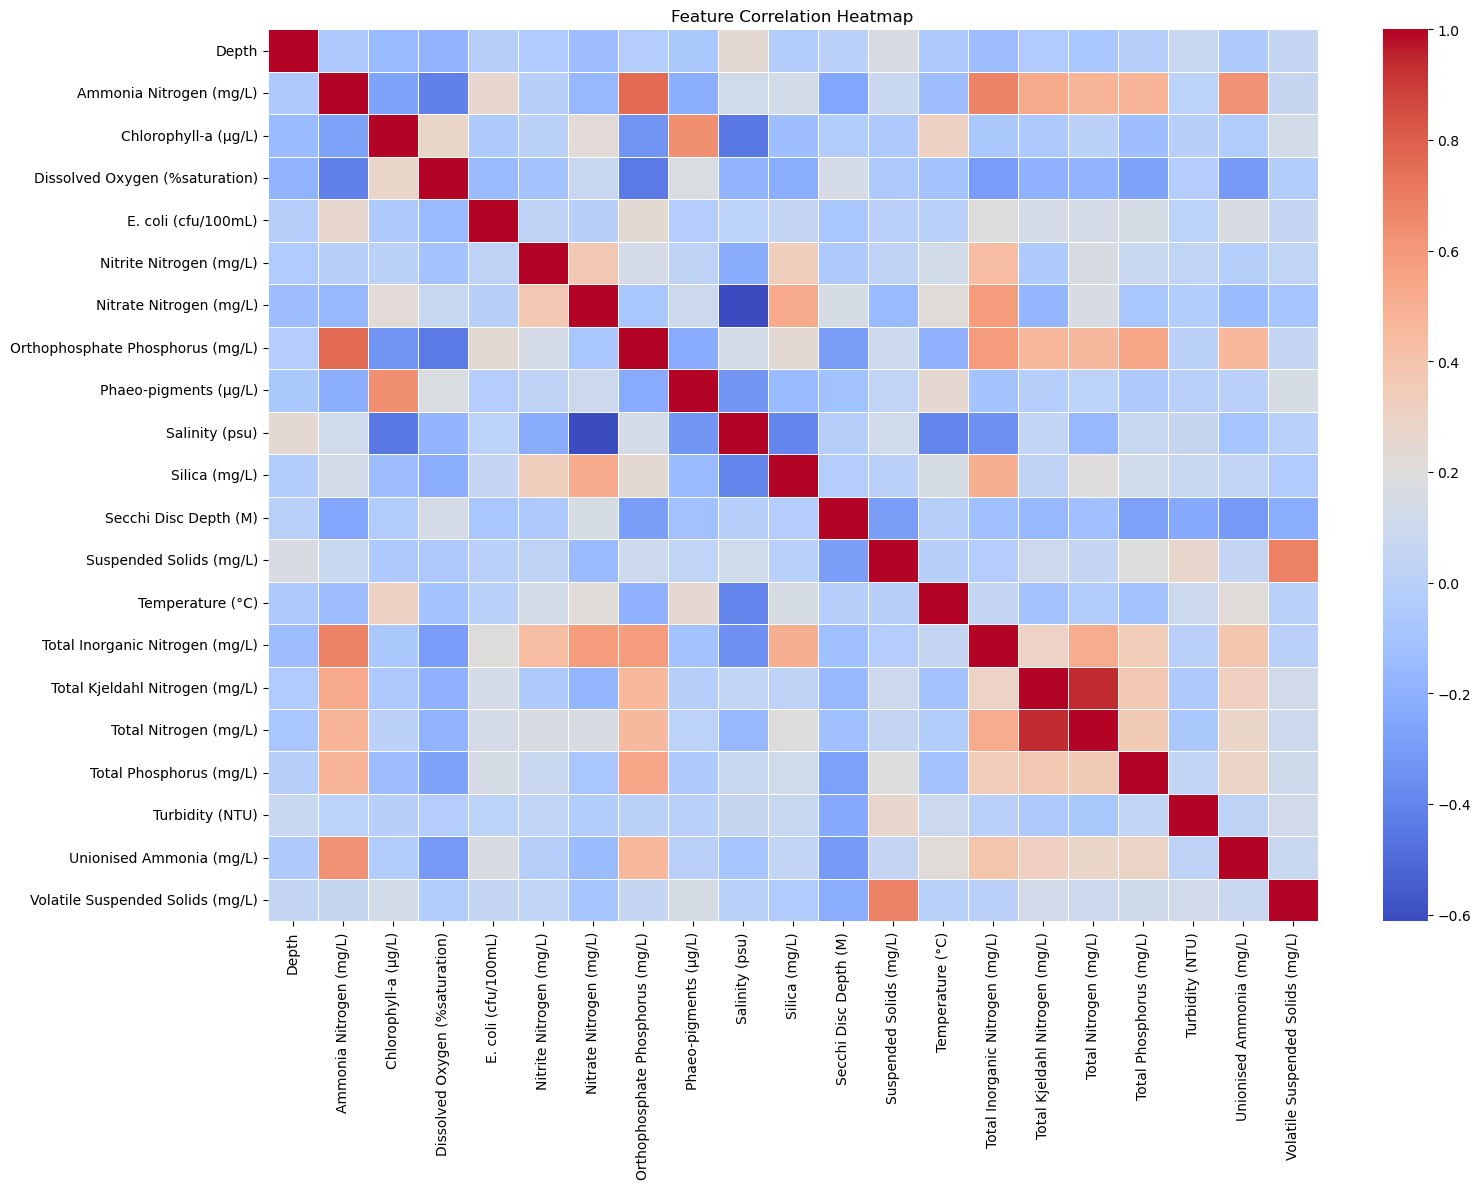

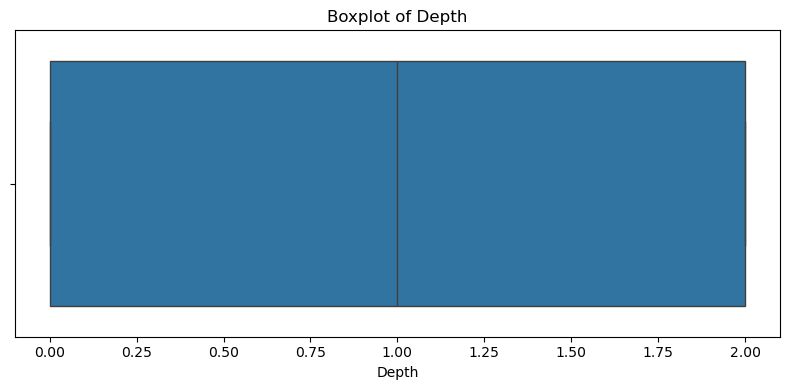

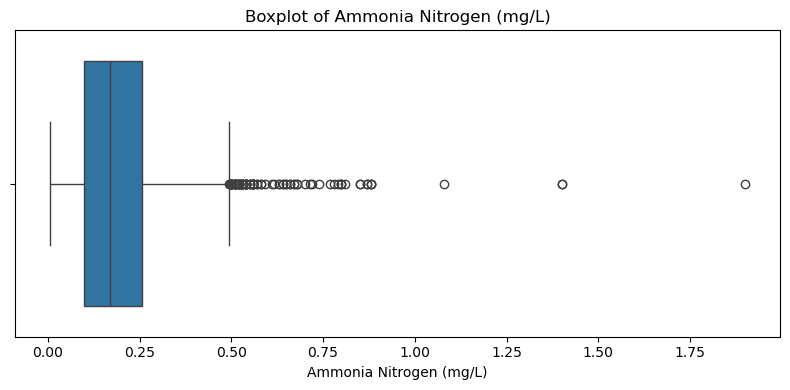

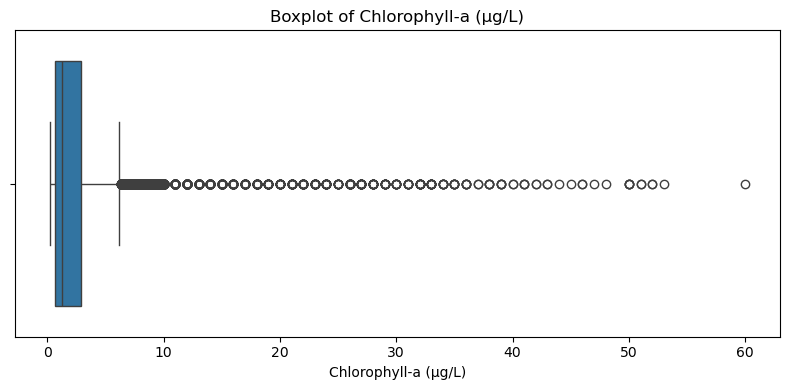

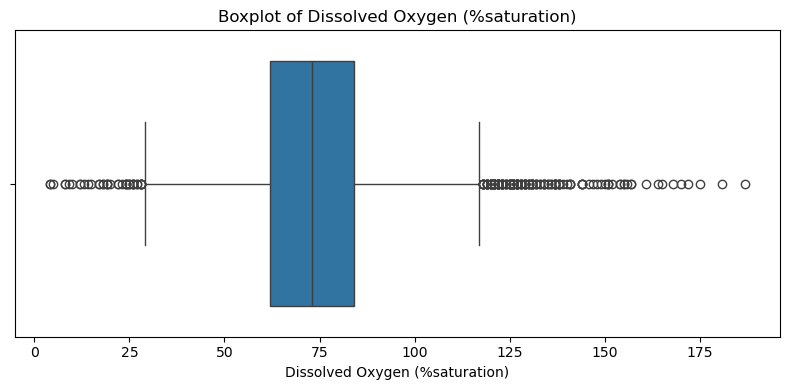

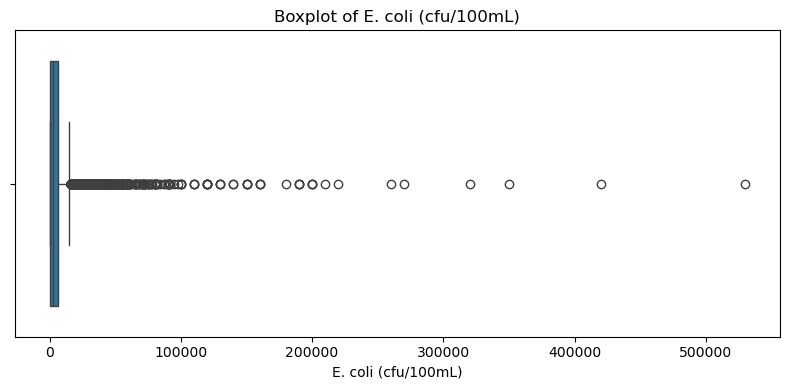

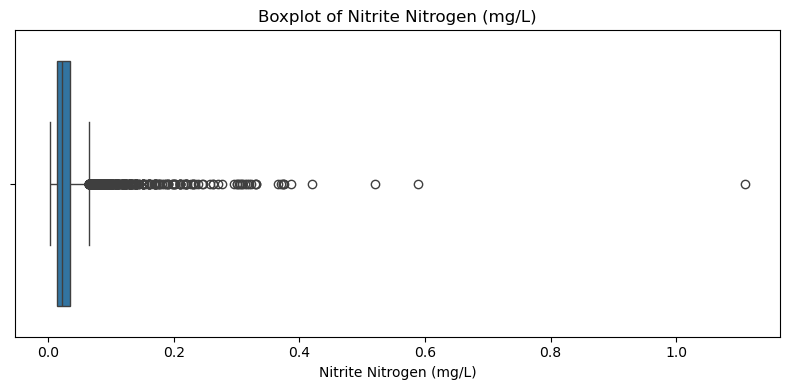

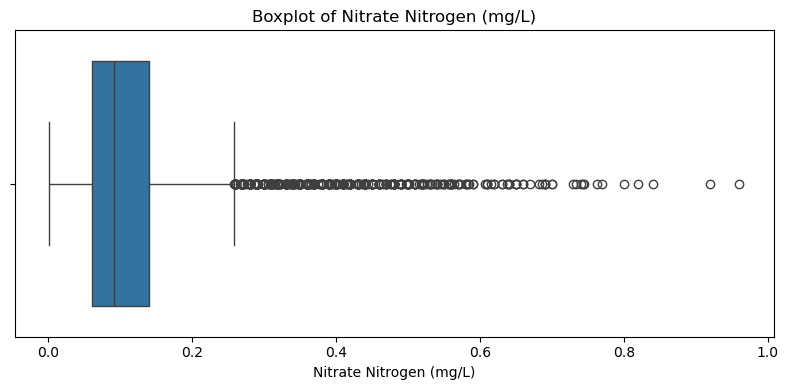

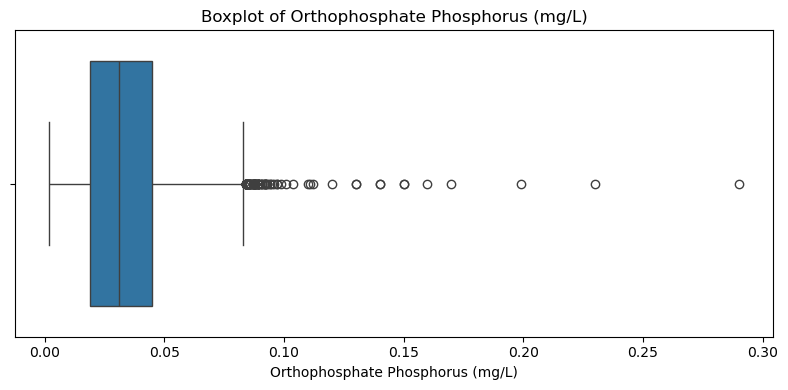

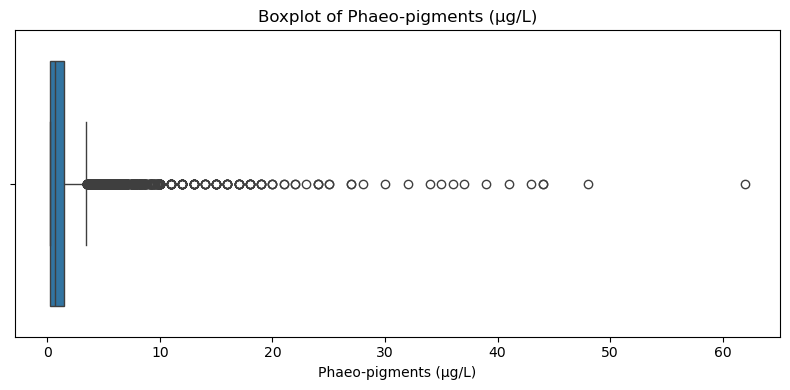

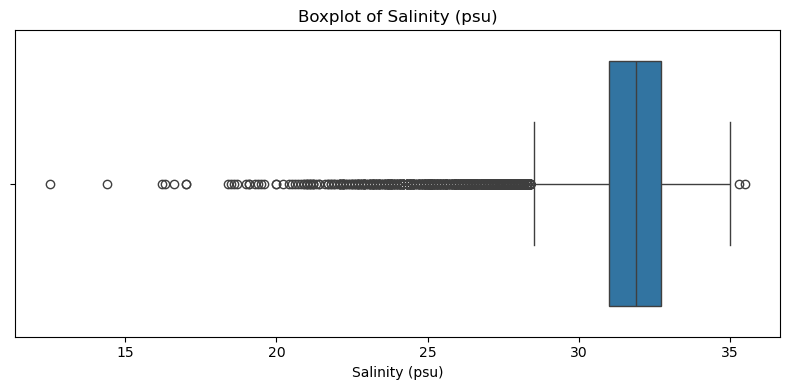

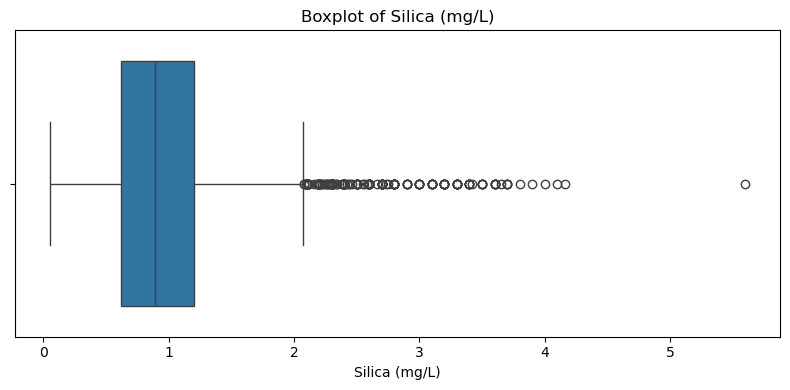

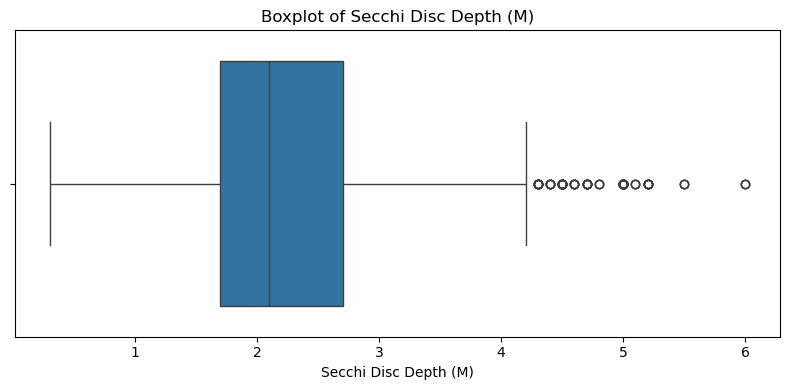

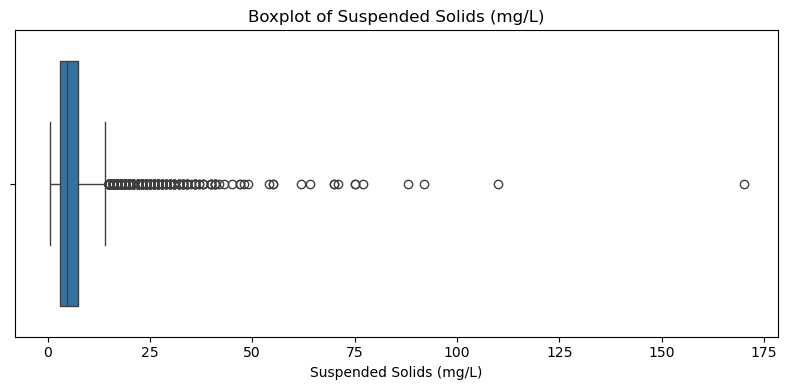

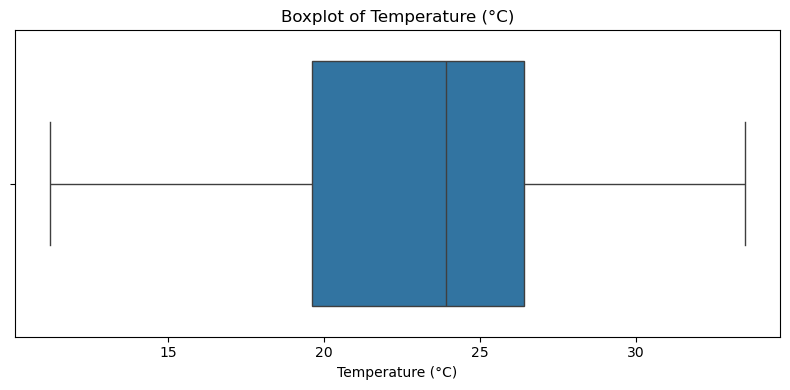

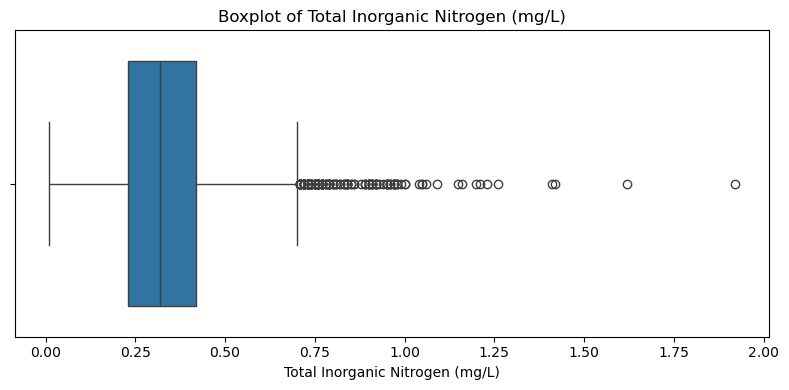

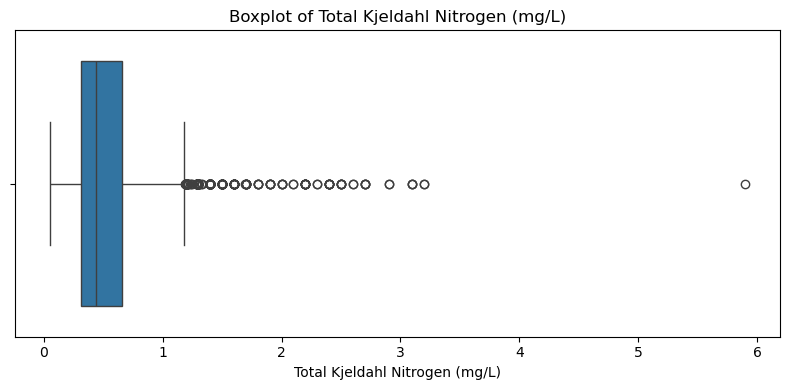

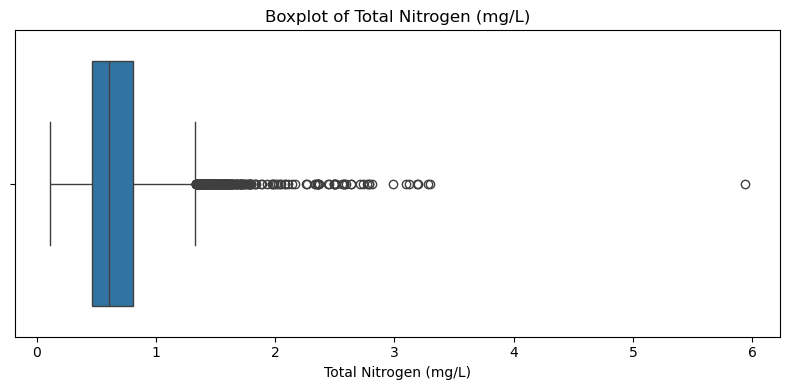

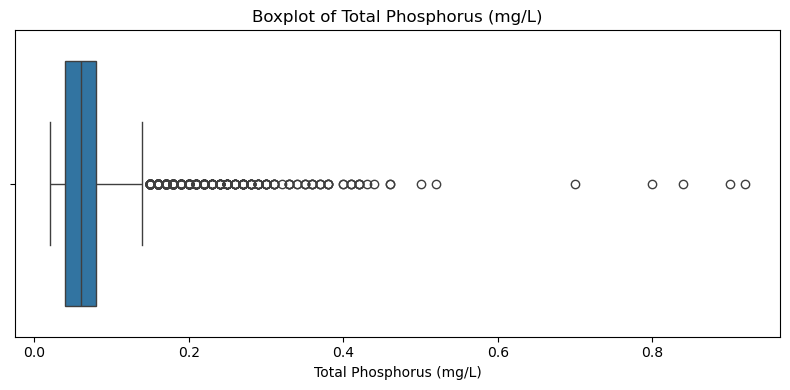

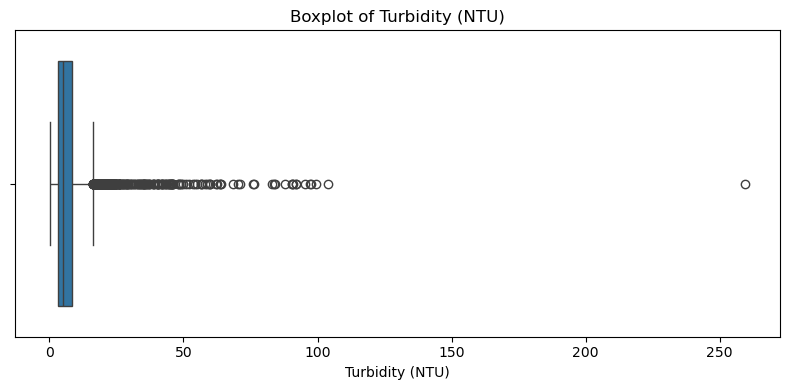

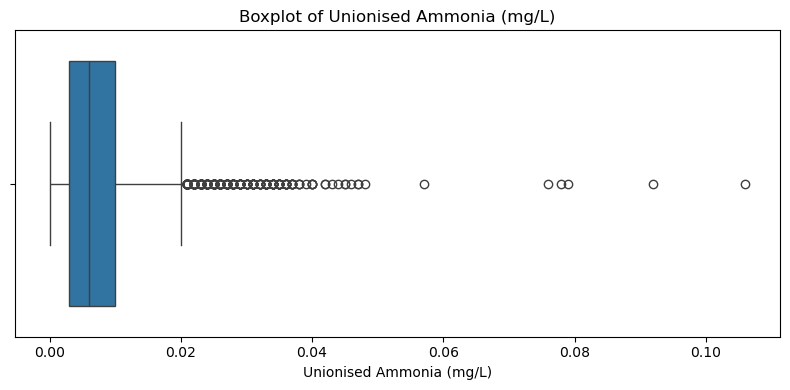

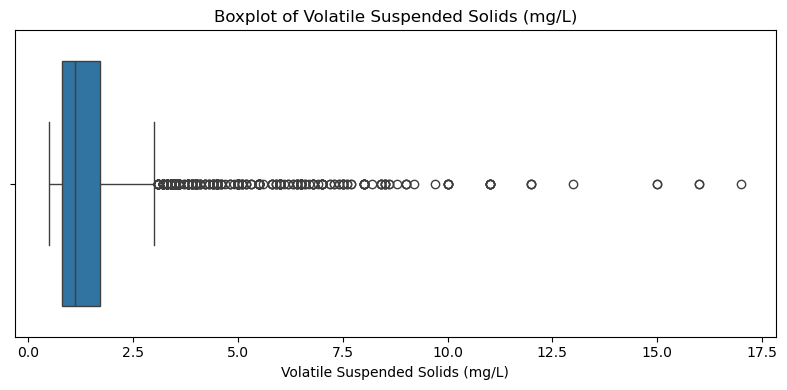

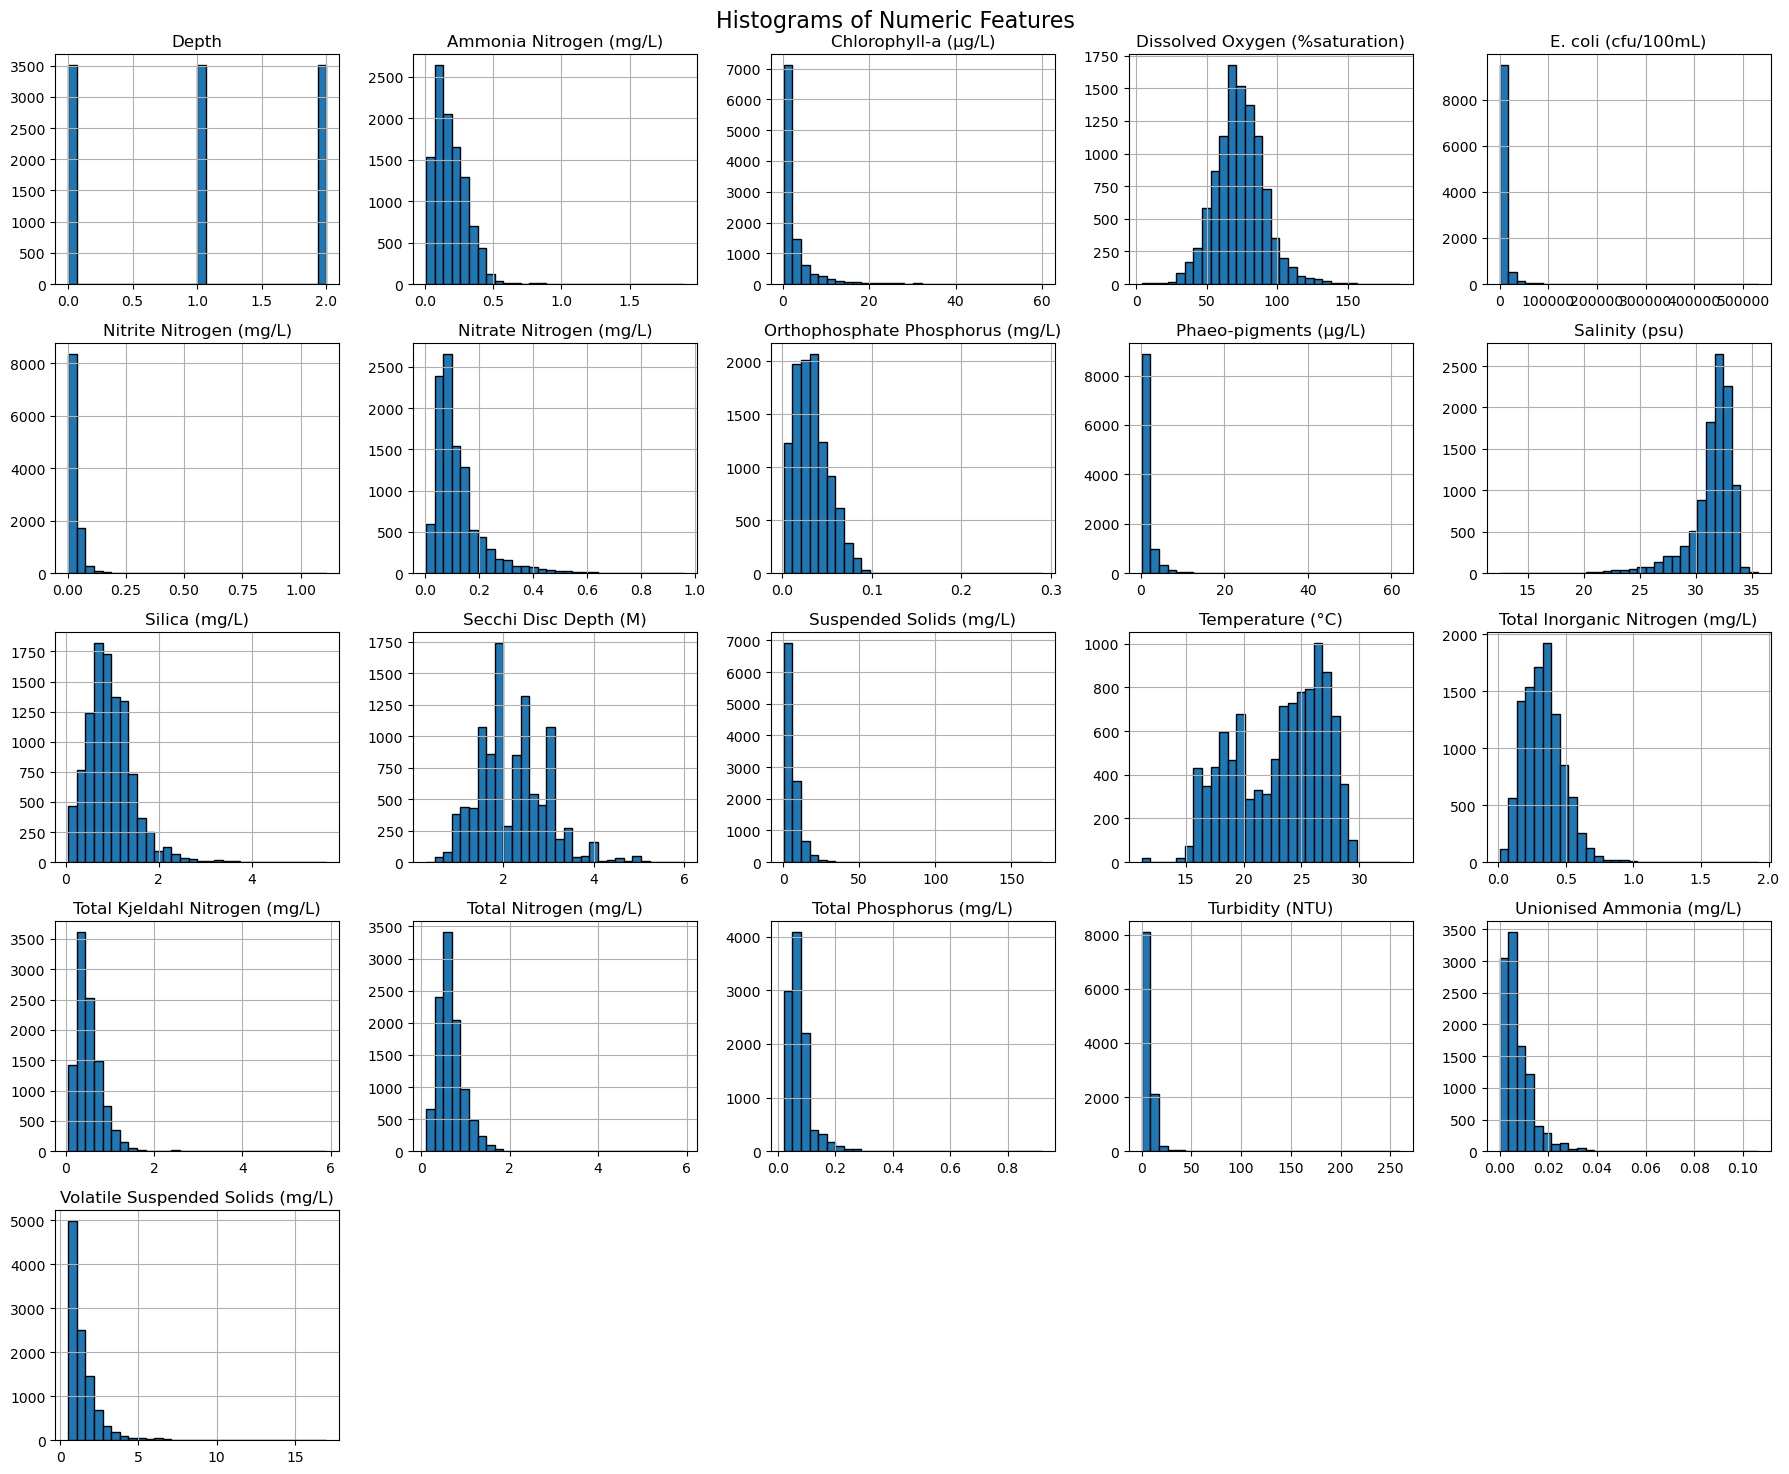

In [1]:
# eda.py or run inside a Jupyter notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('../data/processed/marine_water_quality_cleaned.csv')

# Basic info
print("Dataset shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nSummary statistics:\n", df.describe())

# Check label distribution
if 'label' in df.columns:
    print("\nLabel distribution:\n", df['label'].value_counts())
    sns.countplot(data=df, x='label')
    plt.title('Label Distribution')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Correlation matrix
plt.figure(figsize=(16, 12))
numeric_df = df.select_dtypes(include=np.number)
corr = numeric_df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

# Boxplots for numeric features
for column in numeric_df.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()
    plt.show()

# Histograms
numeric_df.hist(figsize=(18, 15), bins=30, edgecolor='black')
plt.suptitle('Histograms of Numeric Features', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

# Pairplot (Optional: use small sample for large datasets)
# sns.pairplot(df.sample(500), hue='label')
# plt.show()
